In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objects as go
%matplotlib inline

In [2]:
total_fight_data = pd.read_csv('raw_total_fight_data.csv', sep=';')
total_fight_data

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,...,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,...,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,...,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,...,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,...,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,1,0,11 of 17,0 of 3,64%,0%,11 of 17,0 of 3,...,0 of 0,KO/TKO,1,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Gerard Gordeau
5140,Ken Shamrock,Patrick Smith,0,0,1 of 1,4 of 8,100%,50%,4 of 4,16 of 20,...,2 of 6,Submission,1,1:49,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Ken Shamrock
5141,Royce Gracie,Art Jimmerson,0,0,0 of 3,0 of 0,0%,0%,4 of 7,0 of 0,...,0 of 0,Submission,1,2:18,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Royce Gracie
5142,Kevin Rosier,Zane Frazier,2,0,15 of 27,12 of 28,55%,42%,38 of 53,13 of 29,...,2 of 2,KO/TKO,1,4:20,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Open Weight Bout,Kevin Rosier


In [3]:
fighter_details = pd.read_csv('raw_fighter_details.csv', sep=',')
fighter_details

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,"5' 4""",145 lbs.,NaN,NaN,NaN
1,AJ Matthews,"5' 11""",185 lbs.,NaN,NaN,NaN
2,AJ McKee,"5' 10""",145 lbs.,NaN,NaN,NaN
3,AJ Siscoe,"5' 7""",135 lbs.,NaN,NaN,NaN
4,Aalon Cruz,"6' 0""",145 lbs.,NaN,NaN,NaN
...,...,...,...,...,...,...
3308,Zelim Imadaev,"6' 0""",170 lbs.,"76""",Orthodox,"Jan 25, 1995"
3309,Zhang Lipeng,"5' 11""",155 lbs.,"71""",Southpaw,"Mar 10, 1990"
3310,Zoila Frausto,"5' 4""",135 lbs.,NaN,Orthodox,NaN
3311,Zu Anyanwu,"6' 1""",251 lbs.,"77""",Orthodox,"Aug 05, 1981"


In [4]:
data = pd.read_csv('data.csv')
data

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,1.0,0.0,0.0,1.0,Orthodox,195.58,NaN,216.0,NaN,34.0
5140,Ken Shamrock,Patrick Smith,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,185.42,182.88,205.0,30.0,29.0
5141,Royce Gracie,Art Jimmerson,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Southpaw,185.42,NaN,175.0,30.0,26.0
5142,Kevin Rosier,Zane Frazier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,193.04,NaN,275.0,NaN,NaN


In [5]:
# getting top 25 fighters with most fight wins
most_wins = total_fight_data['Winner'].value_counts().head(25)
most_wins

Donald Cerrone        23
Georges St-Pierre     20
Demian Maia           20
Michael Bisping       20
Jim Miller            19
Diego Sanchez         18
Matt Hughes           18
Rafael Dos Anjos      18
Jon Jones             18
Anderson Silva        17
Frankie Edgar         17
Dustin Poirier        17
Lyoto Machida         16
Max Holloway          16
Gleison Tibau         16
Chuck Liddell         16
Randy Couture         16
Frank Mir             16
Andrei Arlovski       16
Demetrious Johnson    15
Josh Koscheck         15
Tony Ferguson         15
Ryan Bader            15
Tito Ortiz            15
Jeremy Stephens       15
Name: Winner, dtype: int64

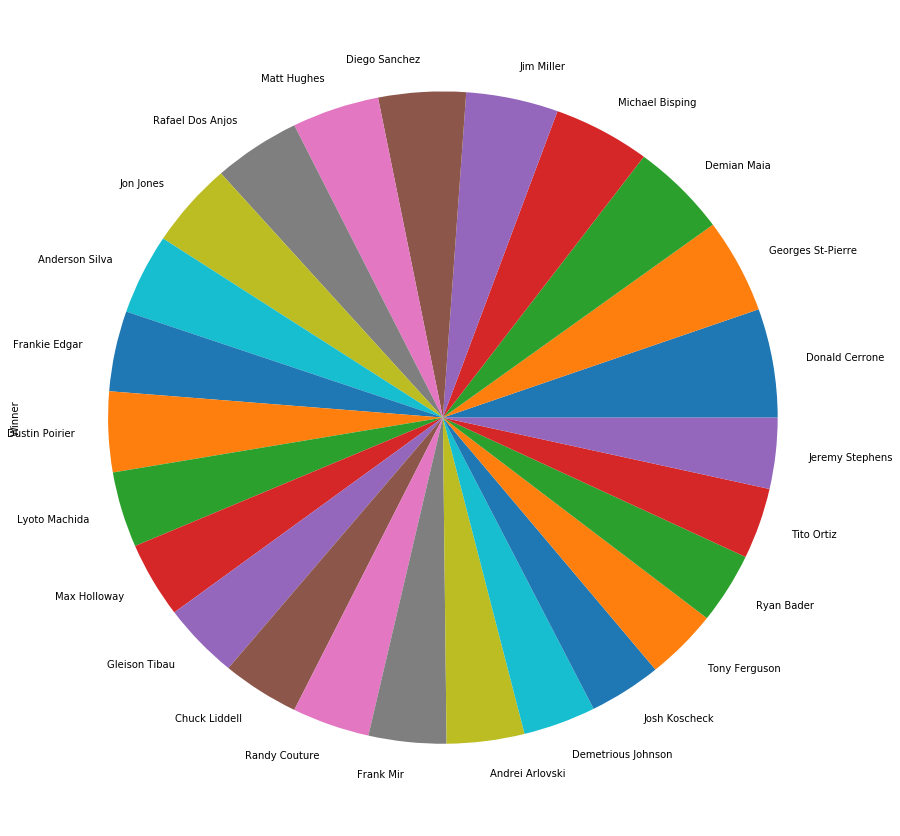

In [6]:
 plot1 = most_wins.plot.pie(y='Winner', figsize=(15, 15))

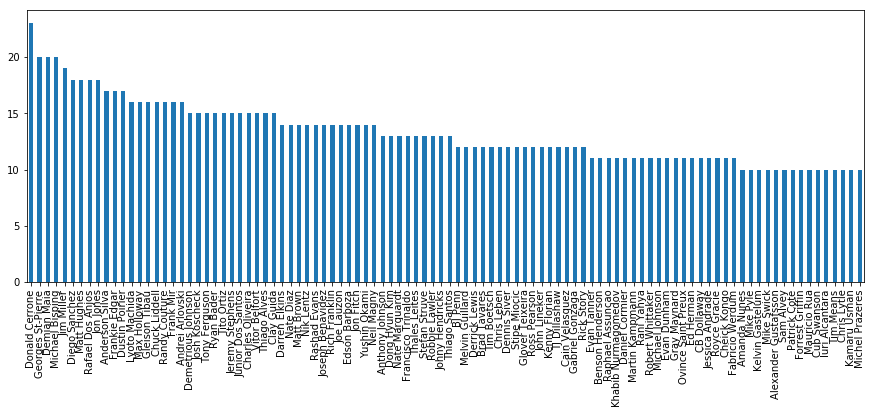

In [7]:
total_fight_data['Winner'].value_counts().head(100).plot.bar(figsize=(15,5))
#Clearly Donald Cerrone is almost twice as good as every other fighter in the UFC

In [8]:
# getting top 20 most experienced referees
referee_experience = total_fight_data['Referee'].value_counts().head(20)
referee_experience

Herb Dean           726
John McCarthy       634
Mario Yamasaki      391
Dan Miragliotta     347
Marc Goddard        276
Yves Lavigne        259
Steve Mazzagatti    201
Leon Roberts        179
Keith Peterson      139
Josh Rosenthal      119
Chris Tognoni        89
Jason Herzog         85
Steve Perceval       73
Mark Smith           66
John Sharp           65
Jerin Valel          65
Kevin MacDonald      64
Kevin Mulhall        59
Kerry Hatley         45
Kim Winslow          42
Name: Referee, dtype: int64

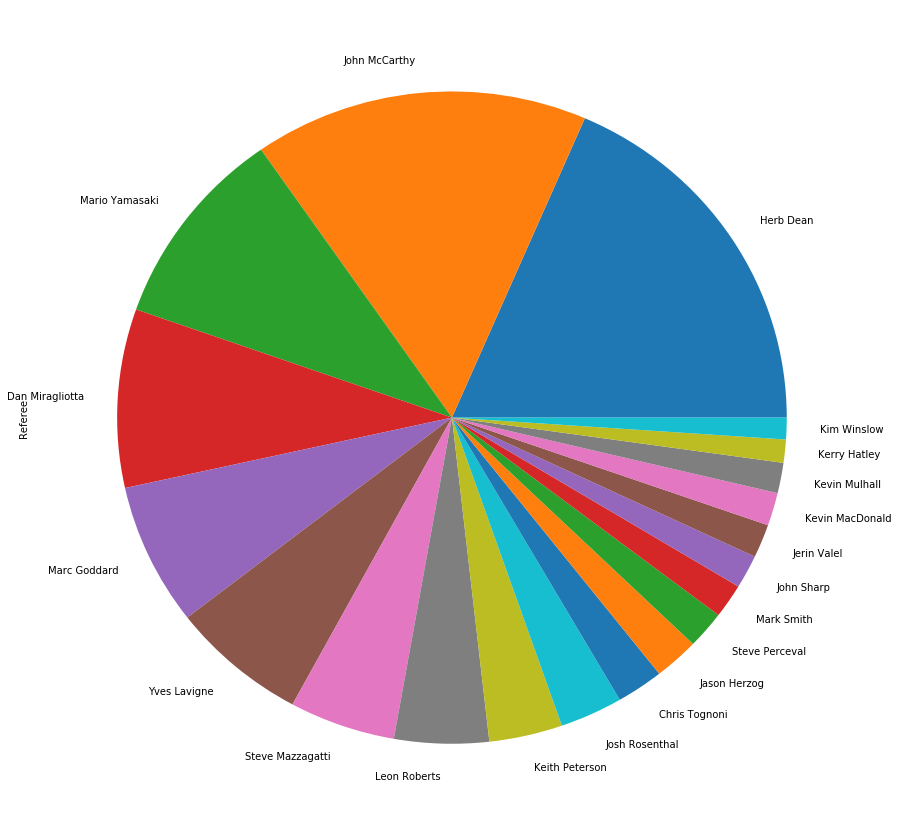

In [9]:
plot2 = referee_experience.plot.pie(y='Referee', figsize=(15, 15))

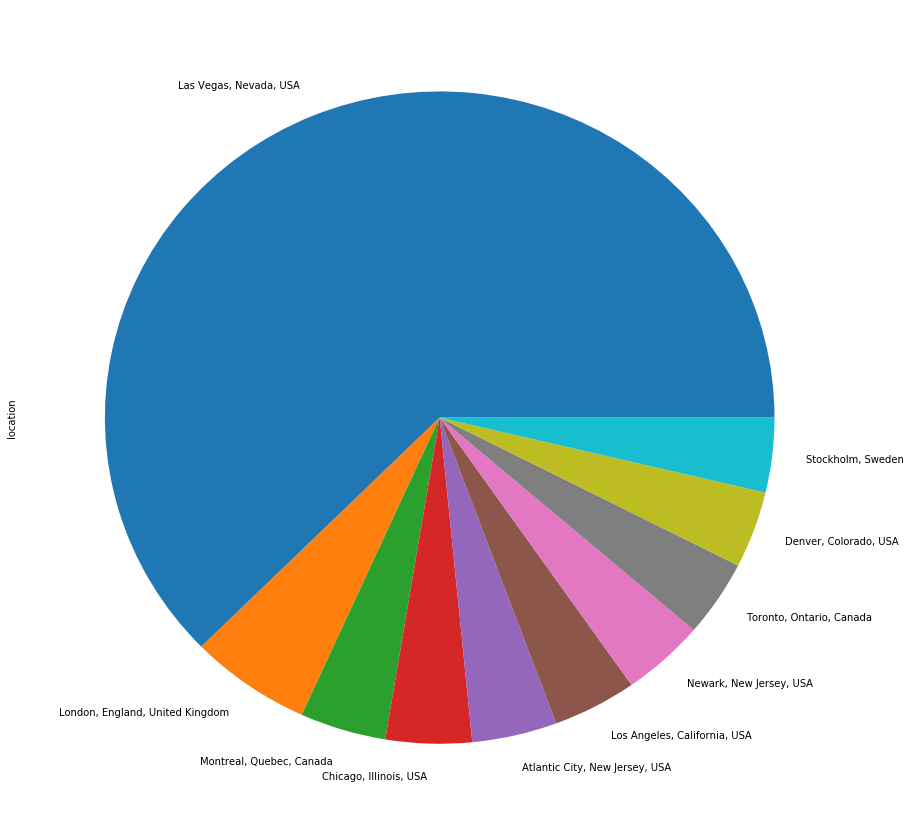

In [10]:
# getting top 10 fight locations
fight_location = total_fight_data['location'].value_counts().head(10)
fight_location
plot3 = fight_location.plot.pie(y='location', figsize=(15, 15))

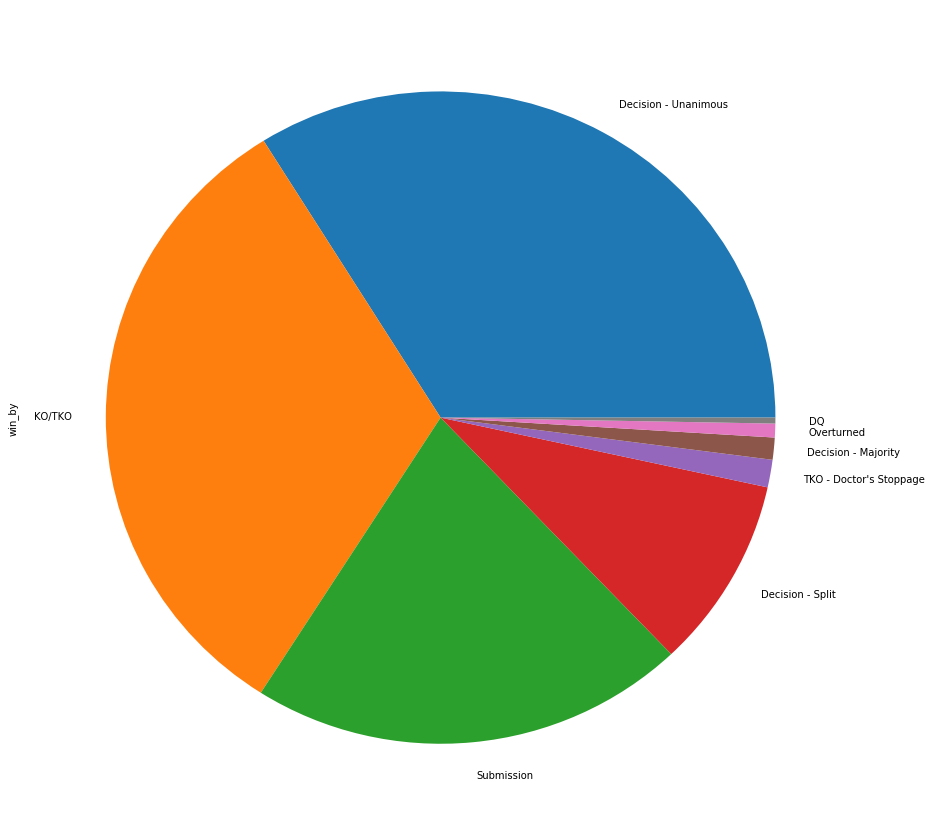

In [11]:
# Plotting win types
win_type = total_fight_data['win_by'].value_counts().head(8)
plot4 = win_type.plot.pie(y='win_by', figsize=(15, 15))